In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습](Next!!!!)
* 기상 데이터 분석
* 데이터 수집 : !wget "url"
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [29]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0  91603      0 --:--:-- --:--:-- --:--:-- 91990
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: weather.csv


In [104]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0)
weather

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [105]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )

#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean()
weather.fillna(mean_wind, inplace=True)
weather

평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN


,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [ ]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기


In [106]:
# 3.1 데이터프레임 평탄화
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [107]:
weather.reset_index(inplace=True)
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


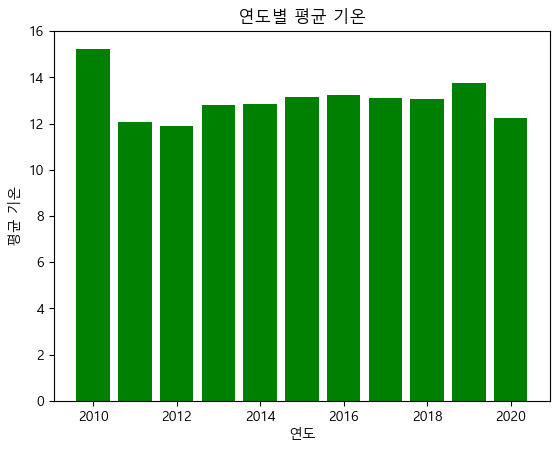

In [108]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year

# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()

# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [109]:
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속,year
0,2010-08-01,28.7,8.3,3.4,2010
1,2010-08-02,25.2,8.7,3.8,2010
2,2010-08-03,22.1,6.3,2.9,2010
3,2010-08-04,25.3,6.6,4.2,2010
4,2010-08-05,27.2,9.1,5.6,2010


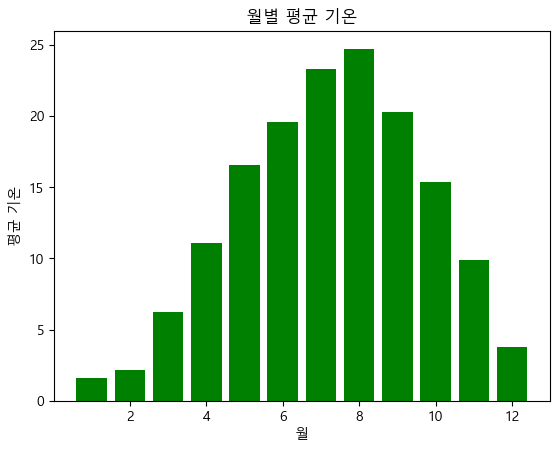

In [110]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


Text(0, 0.5, '평균 풍속')

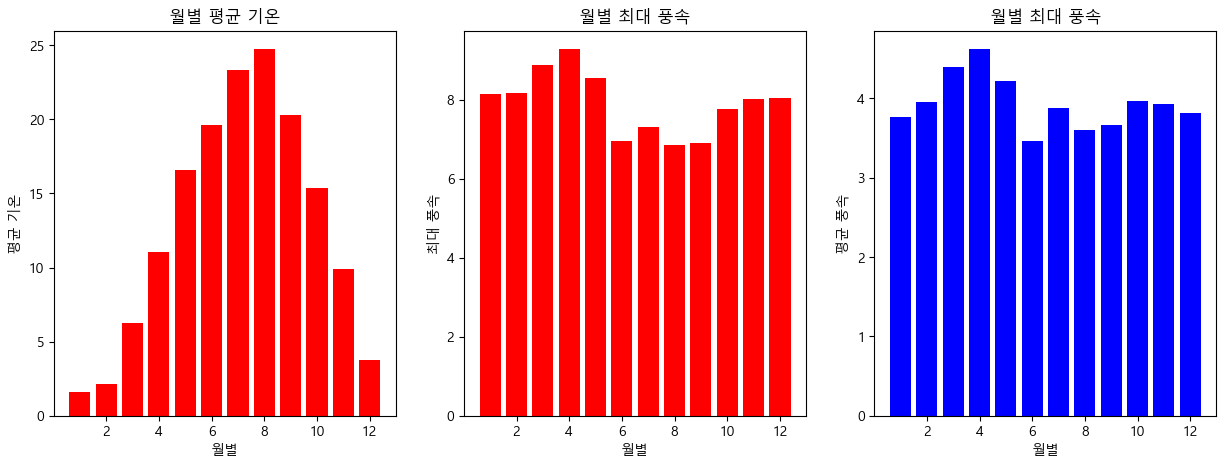

In [111]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

Text(0, 0.5, '평균 풍속')

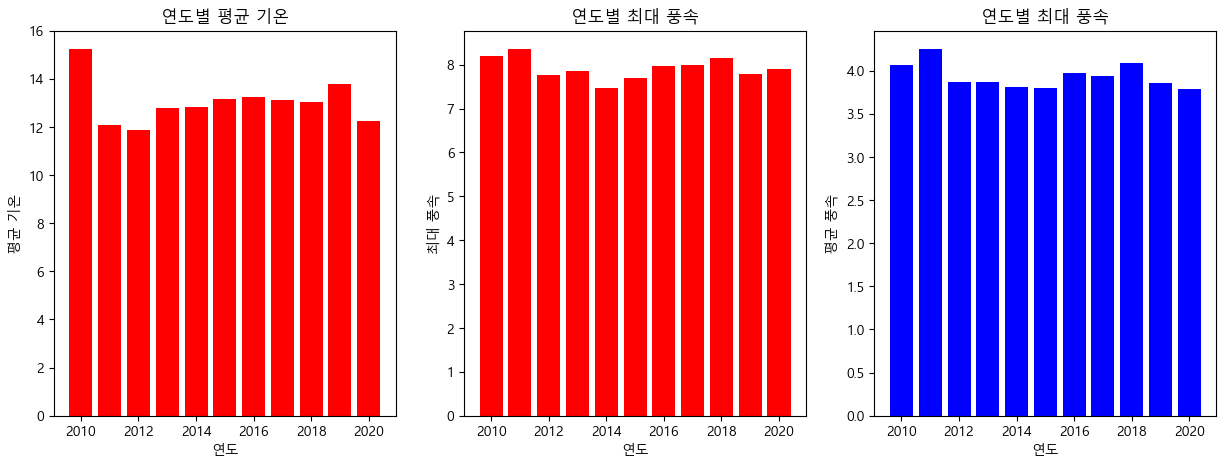

In [112]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [14]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [113]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
3,6.250323,8.871935,4.388827
4,11.064667,9.287121,4.617910
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

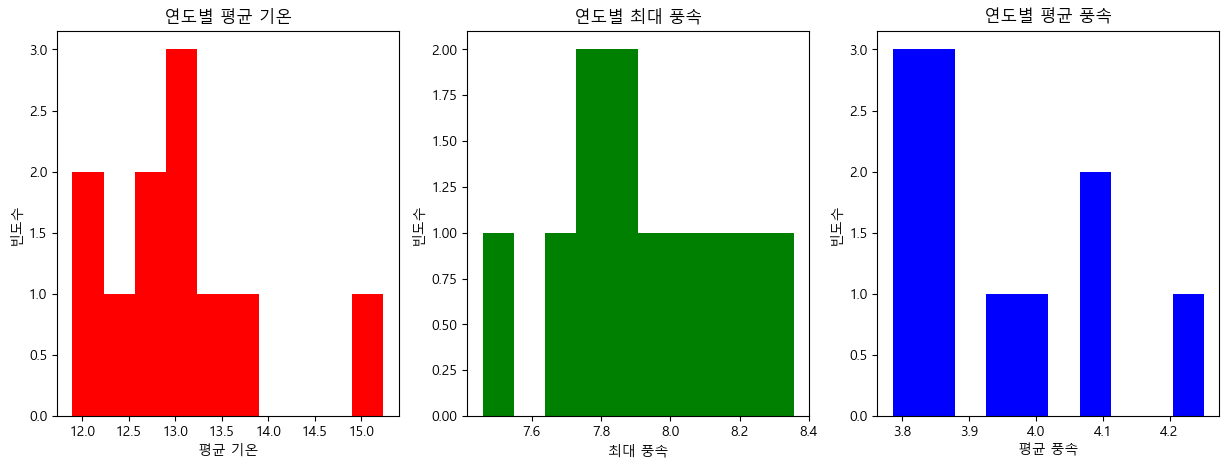

In [114]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스트그램으로 출력하시오.

# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


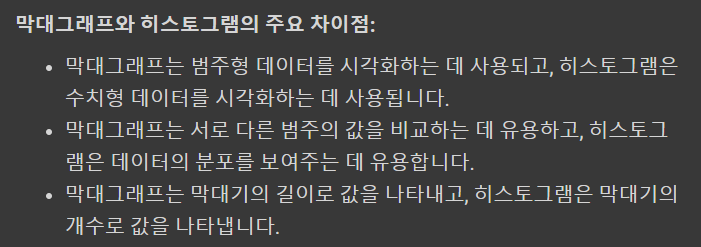

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [115]:
import pandas as pd
weather = pd.read_csv("weather.csv", index_col=0)
print(weather.head(3))
print(weather.iloc[-3:])

            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [116]:
import pandas as pd
weather = pd.read_csv("weather.csv", index_col=0)
print(weather.loc["2015-06-06", ["평균 기온", "평균 풍속"]])

평균 기온    16.6
평균 풍속     1.9
Name: 2015-06-06, dtype: float64


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [117]:
import pandas as pd
weather = pd.read_csv("weather.csv", index_col=0)
hottest_day = weather[weather["평균 기온"] == weather["평균 기온"].max()].index[0]
print(weather.loc[hottest_day])

평균 기온    31.3
최대 풍속     7.8
평균 풍속     4.6
Name: 2013-08-08, dtype: float64


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [118]:
import pandas as pd
weather = pd.read_csv("weather.csv", index_col=0)
# "평균 기온"이 30도를 넘는 날짜 찾기
hot_days = weather[weather["평균 기온"] > 30]
print(hot_days)

            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6
2013-08-09   30.6    9.9    6.4
2013-08-10   30.6    7.4    3.8
2018-07-23   30.5    6.5    1.6
2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

# 데이터 셋 가져오기
weather = pd.read_csv("weather.csv", index_col = 0)

# 연도별 평균 계산
yearly_means = weather.groupby('year')[['최대 풍속']].mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 연도별 최대 풍속
ax.bar(np.arange(2010, 2021), yearly_means['최대 풍속'], color="red")
ax.set_title("연도별 최대 풍속의 평균")
ax.set_xlabel("연도")
ax.set_ylabel("평균 최대 풍속")

plt.show()

KeyError: 'year'

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

In [132]:
import numpy as np

# 연도별 기상 정보의 평균 계산
yearly_means = weather.groupby('year')[['최대 풍속']].mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 연도별 최대 풍속
ax.bar(np.arange(2010, 2021), yearly_means['최대 풍속'], color="red")
ax.set_title("연도별 최대 풍속의 평균")
ax.set_xlabel("연도")
ax.set_ylabel("평균 최대 풍속")

plt.show()

KeyError: 'year'

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


In [133]:
import numpy as np

# 데이터 셋 가져오기
weather = pd.read_csv("weather.csv", index_col = 0)

# 연도별 평균 계산
yearly_means = weather.groupby('year')[['평균 풍속']].mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 연도별 평균 풍속
ax.bar(np.arange(2010, 2021), yearly_means['평균 풍속'], color="blue")
ax.set_title("연도별 평균 풍속")
ax.set_xlabel("연도")
ax.set_ylabel("평균 풍속")

plt.show()

KeyError: 'year'

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [135]:
import pandas as pd

# 데이터프레임으로 읽기 (index_col=0으로 첫 번째 열을 인덱스로 지정, parse_dates로 '일시' 열을 datetime 형식으로 변환)
weather = pd.read_csv("weather.csv", index_col=0, parse_dates=['일시'])

# '일시' 열에서 연도 정보 추출하여 'year' 열 추가
weather['year'] = weather['일시'].dt.year

# 2015년과 2016년의 데이터 추출
weather_2015 = weather[weather['year'] == 2015]
weather_2016 = weather[weather['year'] == 2016]

# 2015년과 2016년의 평균 기온 계산
mean_temp_2015 = weather_2015['평균 기온'].mean()
mean_temp_2016 = weather_2016['평균 기온'].mean()

# 결과 출력
if mean_temp_2015 > mean_temp_2016:
    print("2015년이 더 더움")
elif mean_temp_2015 < mean_temp_2016:
    print("2016년이 더 더움.")
else:
    print("2015년과 2016년의 평균 기온이 같음.")

KeyError: '일시'

## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [136]:
import numpy as np
import pandas as pd

# 데이터 셋 가져오기
weather = pd.read_csv("weather.csv", index_col = 0)

# 월별 평균 기온 계산
monthly_means = weather.groupby('월')['평균 기온'].sum()

# 최소값과 최대값 찾기
min_month = monthly_means.idxmin()
max_month = monthly_means.idxmax()

# 결과 출력
print(f"평균 기온의 합이 가장 적은 달: {min_month}")
print(f"평균 기온의 합이 가장 많은 달: {max_month}")

KeyError: '월'

## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [137]:
import numpy as np
import pandas as pd

# 데이터 셋 가져오기
weather = pd.read_csv("weather.csv", index_col = 0)

# 연도별 평균 계산
yearly_means = weather.groupby('year')[['최대 풍속']].mean()

# 최대값 찾기
max_year = yearly_means['최대 풍속'].idxmax()

# 결과 출력
print(f"최대 풍속의 평균이 가장 큰 연도: {max_year}")

KeyError: 'year'